# MULAI

In [1]:
#general purpose packages
import numpy as np
import pandas as pd

import torch
import numpy as np
import random

import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

!pip install emoji
from nltk.corpus import stopwords
import nltk
import re
import string

# Download the 'stopwords' dataset
nltk.download('stopwords')


#data processing
import re, string
import emoji # Import the emoji module
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk

nltk.download('stopwords')

!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os, random, numpy as np, torch
from transformers import set_seed

seed = 42
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"
os.environ["PYTHONHASHSEED"] = str(seed)

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)

set_seed(seed)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

os.chdir("/content/drive/MyDrive/Thesis")


df = pd.read_excel('/content/drive/MyDrive/Thesis/DatasetSentimen Final.xlsx')

df.head()

,linknum,userid,datetime,tweet,influence score,sentimen,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1852258914336936365,sidehustlekuy,2024-11-01 05:58:00,Min @ovo_id akun ovo saya tidak bisa diupgrade...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
1,1852232260444934154,bonbonv_oir,2024-11-01 04:12:00,diskon tix id yg pake gopay itu nanti langsung...,Influence score: 5/10,neutral,NaN,NaN,NaN,NaN
2,1852219018356363496,Paiapelj,2024-11-01 03:20:00,@danawallet Pembayaran PDAM September memang s...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
3,1852206521150791756,Paiapelj,2024-11-01 02:30:00,@danawallet Kak ini mksdnya gimana ya. Pembaya...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
4,1852175197475872866,cinamrons,2024-11-01 01:25:00,"Jumat berkah, aku adain giveaway saldo qris/go...",Influence score: 4/10,positive,NaN,NaN,NaN,NaN


In [5]:

# Cek jumlah nilai null
null_counts = df.isnull().sum()

# Jumlah total baris
total_rows = len(df)

print("Jumlah nilai null pada setiap kolom:")
print(null_counts)
print(f"\nJumlah total baris: {total_rows}")


Jumlah nilai null pada setiap kolom:
linknum               0
userid                0
datetime              0
tweet                 0
influence score       0
sentimen              0
Unnamed: 6         1223
Unnamed: 7         1223
Unnamed: 8         1223
Unnamed: 9         1222
dtype: int64

Jumlah total baris: 1223


In [6]:
df['tweet']=df['tweet'].str.strip()
df.head()

,linknum,userid,datetime,tweet,influence score,sentimen,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1852258914336936365,sidehustlekuy,2024-11-01 05:58:00,Min @ovo_id akun ovo saya tidak bisa diupgrade...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
1,1852232260444934154,bonbonv_oir,2024-11-01 04:12:00,diskon tix id yg pake gopay itu nanti langsung...,Influence score: 5/10,neutral,NaN,NaN,NaN,NaN
2,1852219018356363496,Paiapelj,2024-11-01 03:20:00,@danawallet Pembayaran PDAM September memang s...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
3,1852206521150791756,Paiapelj,2024-11-01 02:30:00,@danawallet Kak ini mksdnya gimana ya. Pembaya...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN
4,1852175197475872866,cinamrons,2024-11-01 01:25:00,"Jumat berkah, aku adain giveaway saldo qris/go...",Influence score: 4/10,positive,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   linknum          1223 non-null   int64         
 1   userid           1223 non-null   object        
 2   datetime         1223 non-null   datetime64[ns]
 3   tweet            1223 non-null   object        
 4   influence score  1223 non-null   object        
 5   sentimen         1223 non-null   object        
 6   Unnamed: 6       0 non-null      float64       
 7   Unnamed: 7       0 non-null      float64       
 8   Unnamed: 8       0 non-null      float64       
 9   Unnamed: 9       1 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 95.7+ KB


# PREPROCESSING TEKS

In [ ]:
kamus_alay=pd.read_csv('/content/drive/MyDrive/Thesis/colloquial-indonesian-lexicon.csv')
kamus_alay=kamus_alay.rename(columns = {'slang' : 'kamus_slang' , 'formal' : 'kamus_perbaikan'})
# Rekonstruksi data sebagai 'dict'
slang_mapping = dict(zip(kamus_alay['kamus_slang'], kamus_alay['kamus_perbaikan']))
kamus_singkatan = pd.read_csv('/content/drive/MyDrive/Thesis/kamus_singkatan.csv', header=None, names=['sebelum_perbaikan', 'setelah_perbaikan'],delimiter=';')
singkatan_mapping=dict(zip(kamus_singkatan['sebelum_perbaikan'],kamus_singkatan['setelah_perbaikan']))


def find_url(string):
    # with valid conditions for urls in string
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)
    return [x[0] for x in url]

def preprocess_tweet(tweet):
    tweet = emoji.demojize(tweet).lower()
    new_tweet = []
    for word in tweet.split():
        if word[0] == '@' or word == '[username]':
            new_tweet.append('@USER')
        elif find_url(word) != []:
            new_tweet.append('HTTPURL')
        elif word == 'httpurl' or word == '[url]':
            new_tweet.append('HTTPURL')
        else:
            word_kamus = kamus_singkatan.get(word, word)
            word_slang = slang_mapping.get(word_kamus, word_kamus)
            new_tweet.append(word_slang)

    return ' '.join(new_tweet)

#clean hashtags diakhir kalimat, tetapi hanya menghilangkan simbol "#" apabila ditemui hashtag ditengah kalimat
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

#stopword tidak digunakan # hilangkan stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))  # Ganti dengan bahasa yang sesuai

    # Daftar kata negasi yang tidak ingin dihapus
    # List of words with negation meaning
    excluded_stopwords = [
        "tidak",
        "bukan",
        "jangan",
        "tak",
        "belum",
        "tidak ada",
        "tidak pernah",
        "justru",
        "malah",
        "hanya",
        "saja",
        "sungguh",
        "amat",
        "terlalu",
        "benar-benar",
        "sangat",
        "sekali",
        "ternyata",
        "tadinya",
        "bahwa",
        "apabila",
        "jika",
        "jikalau",
        "seandainya",
        "sekiranya",
        "sejak",
        "semenjak",
        "sewaktu",
        "sebelum",
        "sesudah",
        "selesai",
        "ketika",
        "kemudian",
        "setelah",
        "sementara",
        "begitu",
        "demikian",
        "seperti",
        "serupa",
        "mirip",
        "sama",
        "seolah-olah",
        "akan",
        "mau",
        "mesti",
        "harus",
        "perlu",
        "patut",
        "boleh",
        "dapat",
        "bisa",
        "mampu",
        "sebaiknya",
        "seharusnya",
        "sempat",
        "tahu",
        "tahulah",
        "ketahui",
        "tandanya",
        "yaitu",
        "adalah",
        "namun",
        "ga",
        "enggak"
    ]

    # Remove negation words from stopwords
    stop_words = set(stop_words).difference(excluded_stopwords)


    word_tokens = text.split()
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])
    return filtered_text


def stem_text(text):
    # Melakukan stemming pada teks
    stemmed_text = stemmer.stem(text)
    return stemmed_text

# Fungsi untuk menghilangkan angka
def remove_numbers(text):
    # Menggunakan regex untuk mengganti angka dengan string kosong
    return re.sub(r'\d+', '', text)

#tidak digunakan #Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)


In [ ]:
texts_new = []
for t in df.tweet:
    texts_new.append(remove_mult_spaces(stem_text(remove_stopwords(clean_hashtags(preprocess_tweet(remove_numbers(t)))))))

In [ ]:
df['text_clean'] = texts_new
df.head()

,linknum,userid,datetime,tweet,influence score,sentimen,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,text_clean
0,1852258914336936365,sidehustlekuy,2024-11-01 05:58:00,Min @ovo_id akun ovo saya tidak bisa diupgrade...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN,min user akun ovo tidak bisa diupgrade premium...
1,1852232260444934154,bonbonv_oir,2024-11-01 04:12:00,diskon tix id yg pake gopay itu nanti langsung...,Influence score: 5/10,neutral,NaN,NaN,NaN,NaN,diskon tix id pakai gopay langsung otomatis da...
2,1852219018356363496,Paiapelj,2024-11-01 03:20:00,@danawallet Pembayaran PDAM September memang s...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN,user bayar pdam september sukses tagih pas mau...
3,1852206521150791756,Paiapelj,2024-11-01 02:30:00,@danawallet Kak ini mksdnya gimana ya. Pembaya...,Influence score: 1/10,negative,NaN,NaN,NaN,NaN,user kak maksud ya bayar tagih pdam september ...
4,1852175197475872866,cinamrons,2024-11-01 01:25:00,"Jumat berkah, aku adain giveaway saldo qris/go...",Influence score: 4/10,positive,NaN,NaN,NaN,NaN,jumat berkah ada giveaway saldo qris gopay k e...


In [ ]:
df.to_csv(
    '/content/drive/MyDrive/Thesis/Thesis_preprocess_final_202504.csv',
    index=False,  # Tidak menyertakan index
    sep=';',      # Gunakan ";" sebagai delimiter
    quoting=1     # Tambahkan tanda kutip ganda pada string (opsi QUOTE_ALL)
)

# SETELAH PREPROCESS

In [8]:
#general purpose packages
import numpy as np
import pandas as pd
import string

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [9]:
from google.colab import drive
drive.mount('/content/drive')

# Read CSV file into DataFrame
df = pd.read_csv('/content/drive/MyDrive/Thesis/Thesis_preprocess_final_202504.csv', sep=';', quoting=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4071843667.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


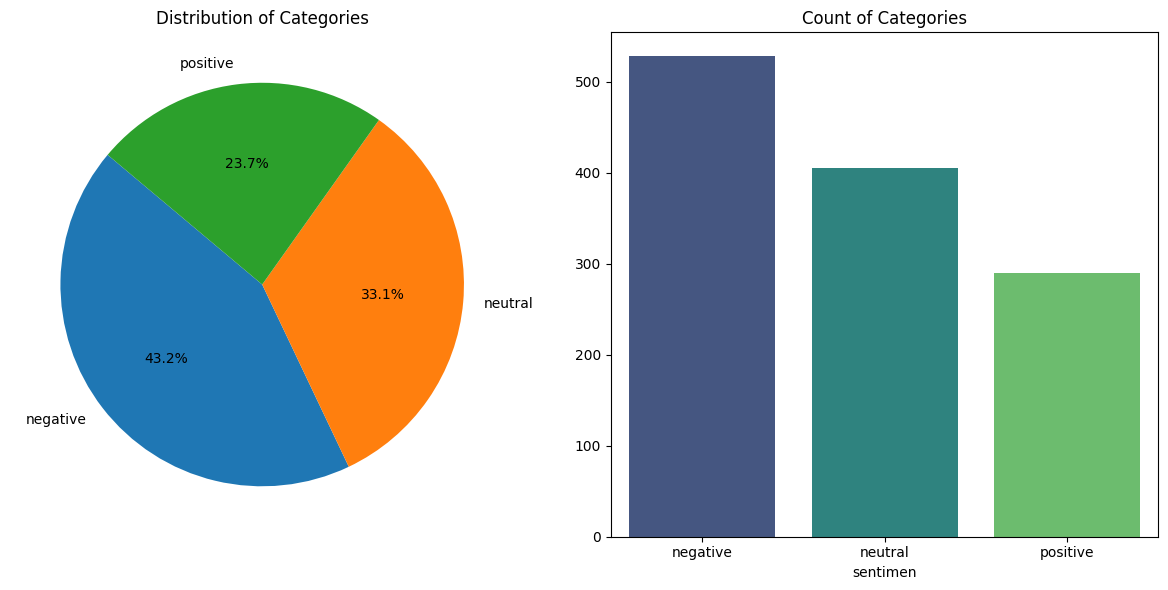

In [10]:
# Value Count Of Label
count = df['sentimen'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Make Seperate Data Set to Visualize text
# negative
df_negative = df[df['sentimen']=='negative']
# neutral
df_neutral = df[df['sentimen']=='neutral']
# positive
df_positive = df[df['sentimen']=='positive']


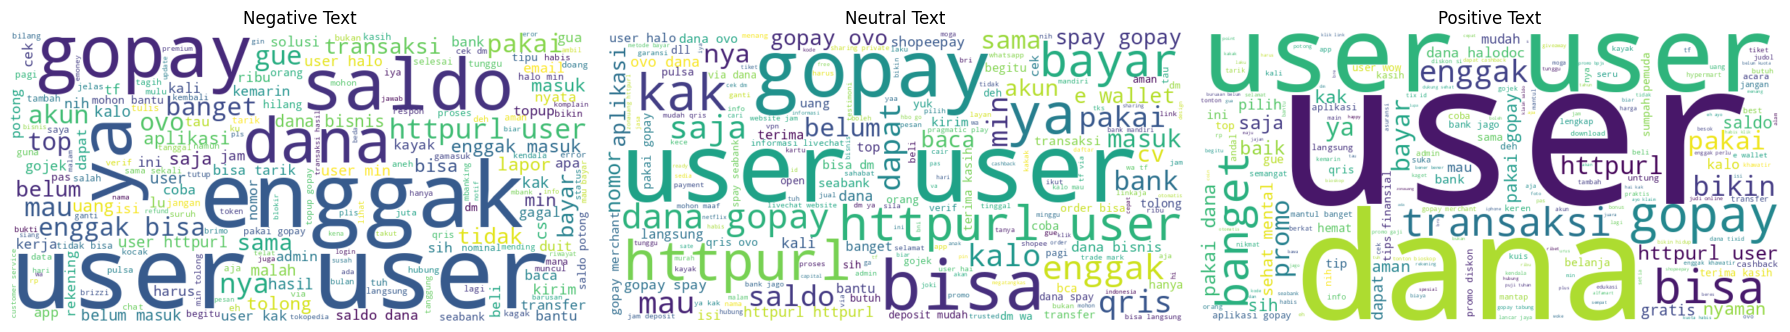

In [12]:
# Combine text from different categories
combined_negative_text = ' '.join(df_negative['text_clean'])
combined_neutral_text = ' '.join(df_neutral['text_clean'])
combined_positive_text = ' '.join(df_positive['text_clean'])

# Create word clouds
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_neutral_text)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_positive_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
X = df['text_clean']
y = df['sentimen']

from sklearn.model_selection import train_test_split

# Train-Test Split (80% Train, 20% Test)
X_train_1st, X_test, y_train_1st, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Train-Validation Split (75% Train dari Train, 25% Validation dari Train)
X_train_ori, X_valid, y_train_ori, y_valid = train_test_split(X_train_1st, y_train_1st, test_size=0.25, random_state=seed, stratify=y_train_1st)

# X_train_ori dan y_train_ori untuk pelatihan model biasa (belum di augmentasi)

# Print the shapes of the training and testing sets
print("X_train ori shape:", X_train_ori.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train ori shape:", y_train_ori.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

X_train ori shape: (733,)
X_valid shape: (245,)
X_test shape: (245,)
y_train ori shape: (733,)
y_valid shape: (245,)
y_test shape: (245,)


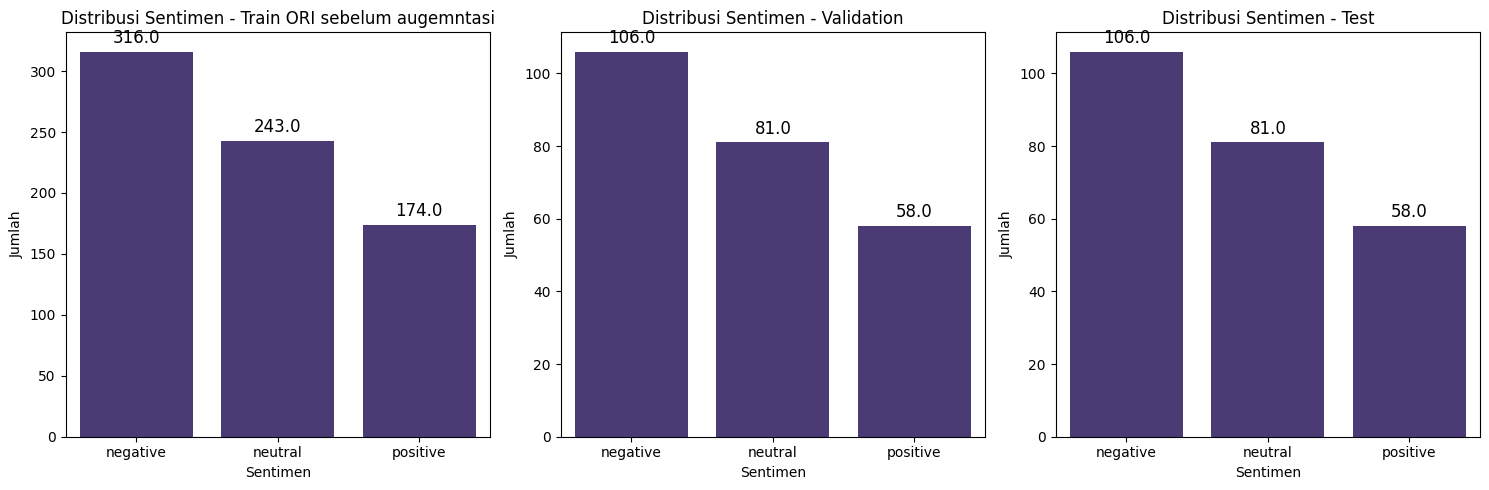

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# Tentukan urutan kategori yang diinginkan
sentiment_order = ["negative", "neutral", "positive"]

# Konversi label ke kategori dengan urutan tertentu
y_train_ori_plot = pd.Series(y_train_ori, dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))
y_valid_plot = pd.Series(y_valid.squeeze(), dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))
y_test_plot = pd.Series(y_test, dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))


# Plot distribusi sentimen pada Train
sns.countplot(x=y_train_ori_plot,  order=sentiment_order, ax=axes[0])
axes[0].set_title('Distribusi Sentimen - Train ORI sebelum augemntasi')
axes[0].set_xlabel('Sentimen')
axes[0].set_ylabel('Jumlah')

# Menambahkan label pada batang di Train
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Plot distribusi sentimen pada Validation
sns.countplot(x=y_valid_plot, order=sentiment_order, ax=axes[1])
axes[1].set_title('Distribusi Sentimen - Validation')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')

# Menambahkan label pada batang di Validation
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Plot distribusi sentimen pada Test
sns.countplot(x=y_test_plot, order=sentiment_order, ax=axes[2])
axes[2].set_title('Distribusi Sentimen - Test')
axes[2].set_xlabel('Sentimen')
axes[2].set_ylabel('Jumlah')


# Menambahkan label pada batang di Test
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()


# SETUP MAXLEN

Top 30 Most Frequent Words:
          word  count  cumulative_count  cumulative_percent
0         user    986               986            8.179857
13       gopay    357              1343           11.141530
16      enggak    284              1627           13.497594
83        dana    276              1903           15.787291
74        bisa    206              2109           17.496267
105    httpurl    192              2301           19.089099
15          ya    178              2479           20.565787
35       saldo    148              2627           21.793595
62       pakai    130              2757           22.872076
34       masuk    110              2867           23.784636
69         kak    104              2971           24.647420
41         mau     96              3067           25.443836
32         ovo     96              3163           26.240252
284     banget     89              3252           26.978596
79         nya     87              3339           27.700348
6        bay

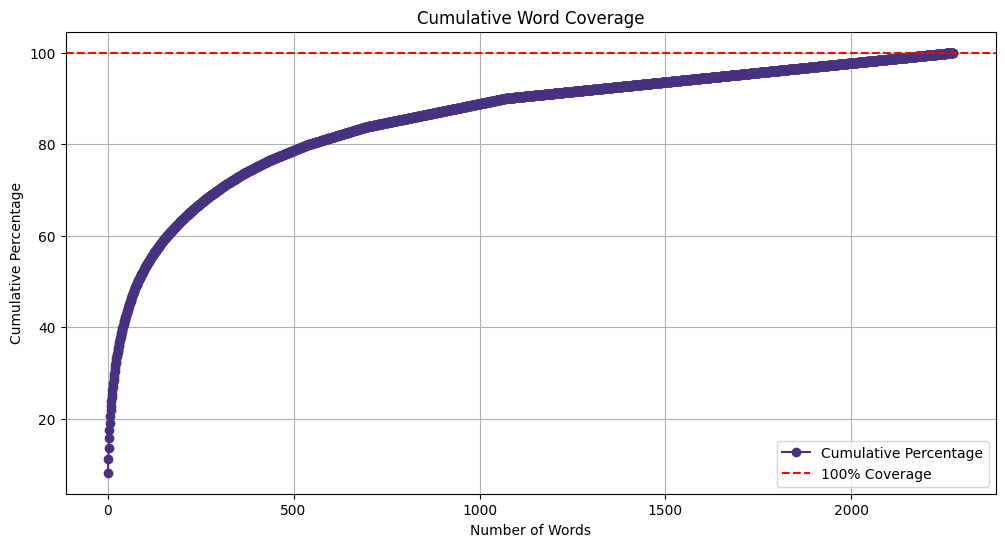

Recommended max_vocab: 2261


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks dari X_train X_train_sub
all_text = " ".join(X_train_ori)
# Tokenisasi manual (split kata berdasarkan spasi)
all_words = all_text.split()

# Hitung frekuensi kata
word_counts = Counter(all_words)

# Buat DataFrame untuk analisis
word_df = pd.DataFrame(word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

# Hitung cakupan kumulatif
word_df["cumulative_count"] = word_df["count"].cumsum()
word_df["cumulative_percent"] = (word_df["cumulative_count"] / word_df["count"].sum()) * 100

# Tampilkan 30 kata teratas berdasarkan frekuensi
print("Top 30 Most Frequent Words:")
print(word_df.head(30))

# Visualisasi Distribusi Frekuensi
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(word_df) + 1), word_df["cumulative_percent"], marker='o', label="Cumulative Percentage")
plt.axhline(y=100, color='r', linestyle='--', label="100% Coverage")
plt.title("Cumulative Word Coverage")
plt.xlabel("Number of Words")
plt.ylabel("Cumulative Percentage")
plt.legend()
plt.grid()
plt.show()

# Tentukan max_vocab berdasarkan coverage
threshold = 100  # Target cakupan (misalnya 100%)
max_vocab = word_df[word_df["cumulative_percent"] >= threshold].index[0] + 1
print(f"Recommended max_vocab: {max_vocab}")


Max length of texts: 50
Min length of texts: 3
Average length of texts: 16.44


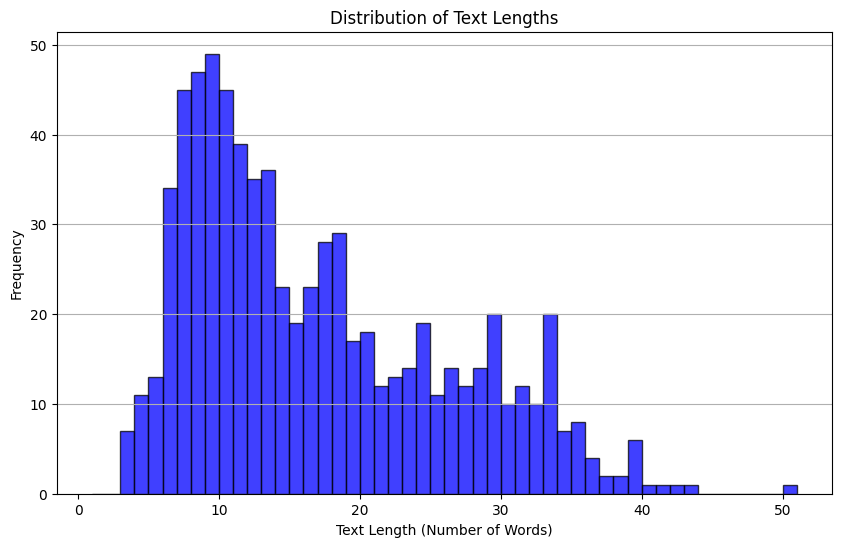

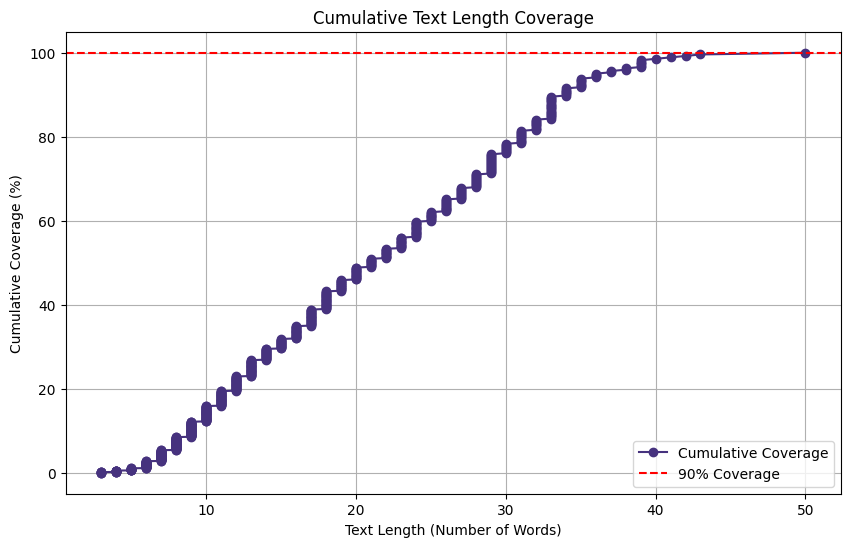

Recommended maxlen: 50


In [16]:
# Menghitung panjang setiap teks (jumlah kata)
#texts = df['text_clean']

texts = X_train_ori

text_lengths = [len(text.split()) for text in texts]

# Analisis panjang teks
print(f"Max length of texts: {max(text_lengths)}")
print(f"Min length of texts: {min(text_lengths)}")
print(f"Average length of texts: {np.mean(text_lengths):.2f}")

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=range(1, max(text_lengths) + 2), alpha=0.75, color="blue", edgecolor="black")
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

# Menentukan cakupan kumulatif untuk panjang teks
sorted_lengths = sorted(text_lengths)
cumulative_coverage = np.cumsum(sorted_lengths) / sum(sorted_lengths) * 100

# Visualisasi cakupan kumulatif
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cumulative_coverage, marker='o', label="Cumulative Coverage")
plt.axhline(y=100, color='r', linestyle='--', label="90% Coverage")
plt.title("Cumulative Text Length Coverage")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Cumulative Coverage (%)")
plt.legend()
plt.grid()
plt.show()

# Menentukan maxlen berdasarkan cakupan
target_coverage = 100  # Persentase cakupan yang diinginkan
for i, length in enumerate(sorted_lengths):
    if cumulative_coverage[i] >= target_coverage:
        recommended_maxlen = length
        break

print(f"Recommended maxlen: {recommended_maxlen}")

In [17]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences

#maxlen = recommended_maxlen
#X_train = pad_sequences(X_train,maxlen=maxlen)
#X_test = pad_sequences(X_test,maxlen=maxlen)

In [18]:
#onehoteconding

y_train_ori_le = y_train_ori.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [19]:
ohe = preprocessing.OneHotEncoder()

y_train_ori_le = ohe.fit_transform(np.array(y_train_ori_le).reshape(-1, 1)).toarray()
y_valid_le = ohe.transform(np.array(y_valid_le).reshape(-1, 1)).toarray()
y_test_le = ohe.transform(np.array(y_test_le).reshape(-1, 1)).toarray()

In [20]:
#print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )
print(f"TRAINING ORI DATA: {X_train_ori.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING ORI DATA: 733
VALIDATION DATA: 245
TESTING DATA: 245


# MODEL BERT VARIAN

## INDOBERTBIGRU (2 LAYER)

In [21]:
from transformers import TFBertModel
import tensorflow as tf

# Define max length
MAX_LEN = 128

def create_model_4(max_len=MAX_LEN):
      # Load IndoBERT model
    indobert_model_v4 = TFBertModel.from_pretrained("indobenchmark/indobert-base-p1")

    # Bekukan seluruh layer IndoBERT
    # Freeze semua dulu
    for layer in indobert_model_v4.layers:
        layer.trainable = False

    # Parameters
    opt = tf.keras.optimizers.Adam(learning_rate=2e-4)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Input layers
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

    # BERT Embeddings (Mengambil SELURUH hidden states)
    bert_output = indobert_model_v4([input_ids, attention_masks])[0]  # (batch_size, max_len, 768)

    # Bidirectional GRU Layer
    gru_output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1))(bert_output)
    dropout_1 = tf.keras.layers.SpatialDropout1D(0.1)(gru_output)
    gru_output = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False, dropout=0.1))(dropout_1)

    # Dense Layer dengan Dropout
    dense = tf.keras.layers.Dense(64, activation='relu')(gru_output)
    dropout = tf.keras.layers.Dropout(0.1)(dense)

    # Output layer
    output = tf.keras.layers.Dense(3, activation='softmax', name='output')(dropout)

    # Create model
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compile model
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])
    return model

# Create IndoBERT model with Bidirectional GRU
model_indobertbigru_v2 = create_model_4(MAX_LEN)
model_indobertbigru_v2.summary()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at indobenchmark/indobert-base-p1 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for prediction

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1244413   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   44         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

# Train & Evaluate Varian BERT

In [22]:
from transformers import BertTokenizer
import time


MAX_LEN=128
def tokenize(data, max_len=MAX_LEN):
    bert_tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
    input_ids = []
    attention_masks = []
    for text in data.values:  # Iterate over the values directly using .values
        encoded = bert_tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)


train_input_ids, train_attention_masks = tokenize(X_train_ori, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

def train_and_evaluate(model, model_name):
    """ Melatih model dan mengevaluasi performanya """
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

    print(f"Training {model_name}...")

    # >>> Perubahan: mulai timer sebelum training
    start_time = time.perf_counter()
    history = model.fit(
        [train_input_ids, train_attention_masks], y_train_ori_le,
        validation_data=([val_input_ids, val_attention_masks], y_valid_le),
        epochs=70,
        batch_size=16,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    end_time = time.perf_counter()
    training_time = end_time - start_time
    # <<< Perubahan: selesai timer


    print(f"Evaluating {model_name}...")
    result = model.predict([test_input_ids, test_attention_masks])
    y_pred = np.zeros_like(result)
    y_pred[np.arange(len(y_pred)), result.argmax(1)] = 1
    y_pred_labels = result.argmax(1)

    report = classification_report(y_test_le, y_pred, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.iloc[:, :-1] = df_report.iloc[:, :-1] * 100  # Konversi ke persen
    df_report = df_report.round(2)
    accuracy = accuracy_score(y_test_le, y_pred) * 100
    df_report.loc['accuracy'] = [accuracy, np.nan, np.nan, np.nan]

    # >>> Perubahan: tambahkan training_time ke dataframe
    df_report.loc['training_time(s)'] = [training_time, np.nan, np.nan, np.nan]
    # <<<

    print(f"Classification Report for {model_name}:")
    print(df_report)
    return df_report, history, y_pred_labels

# Latih dan evaluasi semua model
results_bertvar_ori = {}
histories_bertvar_ori = {}
y_preds_bertvar_ori = {}
#results_bertvar_ori['IndoBERT-GRUv3'], histories_bertvar_ori['IndoBERT-GRUv3'],y_preds_bertvar_ori['IndoBERT-GRUv3']  = train_and_evaluate(model_indobertgru_v3, 'IndoBERT-GRUv3')
#results_bertvar_ori['IndoBERT-Finetuned'],histories_bertvar_ori['IndoBERT-FineTuned'],y_preds_bertvar_ori['IndoBERT-FineTuned'] = train_and_evaluate(model_indobert_finetuned, 'IndoBERT-Finetuned')
#results_bertvar_ori['FinBERT'],histories_bertvar_ori['FinBERT'],y_preds_bertvar_ori['FinBERT'] = train_and_evaluate(model_finbert, 'FinBERT')
#results_bertvar_ori['IndoBERT-Std'],histories_bertvar_ori['IndoBERT-Std'],y_preds_bertvar_ori['IndoBERT-Std'] = train_and_evaluate(model_indobert_standard, 'IndoBERT-Std')
#results_bertvar_ori['IndoBERT-GRU'], histories_bertvar_ori['IndoBERT-GRU'],y_preds_bertvar_ori['IndoBERT-GRU'] = train_and_evaluate(model_indobertgru, 'IndoBERT-GRU')
results_bertvar_ori['IndoBERT-BiGRUv2'], histories_bertvar_ori['IndoBERT-BiGRUv2'], y_preds_bertvar_ori['IndoBERT-BiGRUv2'] = train_and_evaluate(model_indobertbigru_v2, 'IndoBERT-BiGRUv2')
#results_bertvar_ori['IndoBERT-GRUv4'], histories_bertvar_ori['IndoBERT-GRUv4'],y_preds_bertvar_ori['IndoBERT-GRUv4'] = train_and_evaluate(model_indobertgru_v4, 'IndoBERT-GRUv4')
#results_bertvar_ori['IndoBERT-BIGRU'], histories_bertvar_ori['IndoBERT-BIGRU'],y_preds_bertvar_ori['IndoBERT-BIGRU'] = train_and_evaluate(model_indobert_bigru, 'IndoBERT-BIGRU')


# Gabungkan hasil semua model untuk perbandingan
df_comparison = pd.concat(results_bertvar_ori, axis=1)
print("\nFinal Comparison:")
print(df_comparison)


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Training IndoBERT-BiGRUv2...
Epoch 1/70
46/46 [==============================] - 28s 177ms/step - loss: 0.8839 - categorical_accuracy: 0.5989 - val_loss: 0.6187 - val_categorical_accuracy: 0.7551 - lr: 2.0000e-04
Epoch 2/70
46/46 [==============================] - 3s 68ms/step - loss: 0.5851 - categorical_accuracy: 0.7763 - val_loss: 0.5228 - val_categorical_accuracy: 0.7878 - lr: 2.0000e-04
Epoch 3/70
46/46 [==============================] - 3s 64ms/step - loss: 0.4879 - categorical_accuracy: 0.8145 - val_loss: 0.5195 - val_categorical_accuracy: 0.8041 - lr: 2.0000e-04
Epoch 4/70
46/46 [==============================] - 3s 63ms/step - loss: 0.4141 - categorical_accuracy: 0.8349 - val_loss: 0.4973 - val_categorical_accuracy: 0.8122 - lr: 2.0000e-04
Epoch 5/70
46/46 [==============================] - 3s 60ms/step - loss: 0.3677 - categorical_accuracy: 0.8649 - val_loss: 0.5149 - val_categorical_accuracy: 0.8082 - lr: 2.0000e-04
Epoch 6/70
46/46 [==============================] - 3s 58ms

In [23]:
import time
import numpy as np
import pandas as pd

def benchmark_and_predict(model, texts, max_len=MAX_LEN, n_runs=5):
    """Hitung rata-rata waktu inferensi per sample dan hasil prediksi"""
    input_ids, attention_masks = tokenize(pd.Series(texts), max_len)
    times = []
    preds = None
    for _ in range(n_runs):
        start = time.perf_counter()
        preds = model.predict([input_ids, attention_masks], verbose=0)
        end = time.perf_counter()
        times.append(end - start)
    avg_time = np.mean(times) / len(texts)
    return preds, avg_time


# =======================
# Load sample texts
# =======================
df_samples = pd.read_csv("/content/drive/MyDrive/Thesis/sample_text_inference.csv")

if "text_clean" not in df_samples.columns:
    raise ValueError("CSV harus punya kolom 'text_clean'")

sample_texts = df_samples["text_clean"].dropna().tolist()
print(f"Jumlah sample: {len(sample_texts)}")
print("Contoh teks:", sample_texts[:2])


# =======================
# Prediksi semua model
# =======================
results = []
predictions_df = pd.DataFrame({"text_clean": sample_texts})

model_dict = {
    "IndoBERT-BiGRUv2": model_indobertbigru_v2
}

# Mapping label diskrit ke teks
label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}

for name, model in model_dict.items():
    print(f"\nEvaluating {name} ...")

    # Prediksi dan waktu inferensi
    preds, avg_time = benchmark_and_predict(model, sample_texts)

    # Tambahkan skor probabilitas decimal per kelas
    n_classes = preds.shape[1]
    for i in range(n_classes):
        predictions_df[f"{name}_class{i}_score"] = preds[:, i]

    # Prediksi diskrit (kelas tertinggi)
    class_pred = np.argmax(preds, axis=1)
    predictions_df[f"{name}_pred_label"] = class_pred
    predictions_df[f"{name}_pred_text"] = predictions_df[f"{name}_pred_label"].map(label_map)

    # Simpan ringkasan waktu inferensi
    results.append({
        "Model": name,
        "Avg Inference Time (s)": round(avg_time, 5)
    })


# =======================
# Summary waktu inferensi
# =======================
df_summary = pd.DataFrame(results).set_index("Model").sort_values("Avg Inference Time (s)")
print("\nSummary: Average Inference Time per Model")
print(df_summary)


# =======================
# Contoh hasil prediksi
# =======================
print("\nSample Predictions:")
print(predictions_df.head())

# Simpan ke CSV (opsional)
predictions_df.to_csv("/content/predictions_all_models.csv", index=False)


Jumlah sample: 1200
Contoh teks: ['min user akun ovo tidak bisa diupgrade premium pakai data e-ktp nomor tapi tidak aktif mohon bantu case bisa upgrade akun premium tks', 'diskon tix id pakai gopay langsung otomatis dapat cashback koin']

Evaluating IndoBERT-BiGRUv2 ...

Summary: Average Inference Time per Model
                  Avg Inference Time (s)
Model                                   
IndoBERT-BiGRUv2                 0.00136

Sample Predictions:
                                          text_clean  \
0  min user akun ovo tidak bisa diupgrade premium...   
1  diskon tix id pakai gopay langsung otomatis da...   
2  user bayar pdam september sukses tagih pas mau...   
3  user kak maksud ya bayar tagih pdam september ...   
4  jumat berkah ada giveaway saldo qris gopay k e...   

   IndoBERT-BiGRUv2_class0_score  IndoBERT-BiGRUv2_class1_score  \
0                       0.723517                       0.263937   
1                       0.005451                       0.273891   
2   

In [24]:
print(df_comparison)



                 IndoBERT-BiGRUv2                        
                        precision recall f1-score support
Negative                85.950000  98.11    91.63   106.0
Neutral                 90.910000  74.07    81.63    81.0
Positive                82.760000  82.76    82.76    58.0
micro avg               86.530000  86.53    86.53   245.0
macro avg               86.540000  84.98    85.34   245.0
weighted avg            86.830000  86.53    86.22   245.0
samples avg             86.530000  86.53    86.53   245.0
accuracy                86.530612    NaN      NaN     NaN
training_time(s)        45.398378    NaN      NaN     NaN


In [25]:
print("\nSummary: F1-score vs Inference Time")
print(df_summary)


Summary: F1-score vs Inference Time
                  Avg Inference Time (s)
Model                                   
IndoBERT-BiGRUv2                 0.00136


#GAMBAR GRAFIK AKURASI & LOS SAAT TRAINING

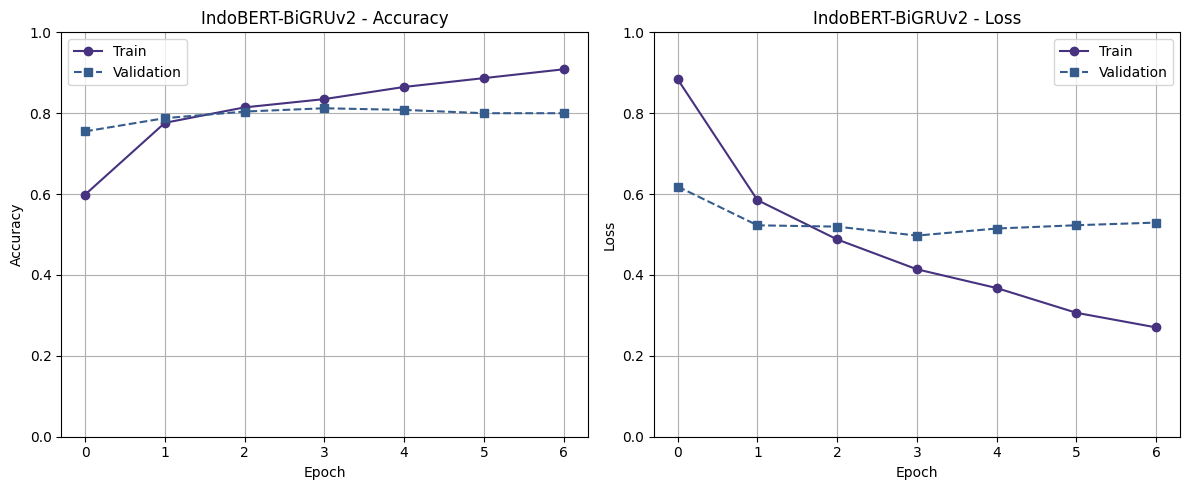

In [26]:
import matplotlib.pyplot as plt

# Plot semua model secara berurutan
for model_name, history in histories_bertvar_ori.items():
    hist = history.history

    # Gunakan kunci yang benar, tergantung dari metrik di compile
    acc_key = 'accuracy' if 'accuracy' in hist else 'categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in hist else 'val_categorical_accuracy'

    plt.figure(figsize=(12, 5))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(hist[acc_key], marker='o', linestyle='-')
    plt.plot(hist[val_acc_key], marker='s', linestyle='--')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # mulai dari nol
    plt.legend(['Train', 'Validation'])
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(hist['loss'], marker='o', linestyle='-')
    plt.plot(hist['val_loss'], marker='s', linestyle='--')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # bisa disesuaikan, misal (0, 2) kalau loss kamu besar
    plt.legend(['Train', 'Validation'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()


#GAMBAR CONFUSION MATRIX

##BERT VARIAN CONFUSION MATRIX

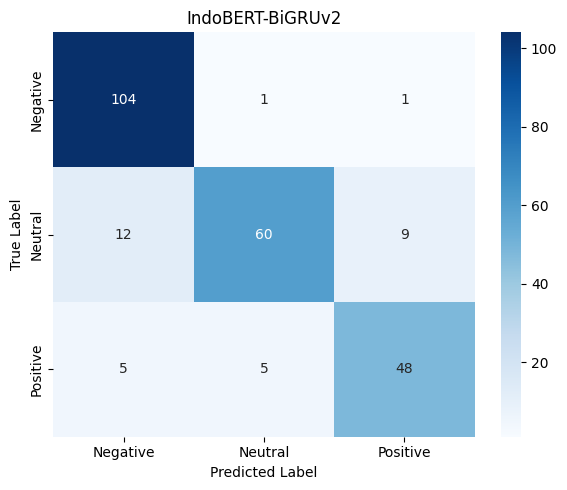

In [27]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix

labels=['Negative', 'Neutral', 'Positive']
y_true = y_test_le.argmax(axis=1)
for model_name, y_pred_labels in y_preds_bertvar_ori.items():
  cm = confusion_matrix(y_true, y_pred_labels)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title(model_name)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.tight_layout()
  plt.show()